In [35]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5

def log_sum_exp(x_k):
    return np.log(np.sum(np.exp(x_k/gamma)))

def W(x,y,v_pair_in):

    w = np.zeros(len(x))
    
    for i in range(len(v_pair_in)):
            t = log_sum_exp(np.array([x[i], x[i+1]]))
            t2 = log_sum_exp(np.array([-x[i],-x[i+1]]))
            t3 = log_sum_exp(np.array([y[i], y[i+1]]))
            t4 = log_sum_exp(np.array([-y[i], -y[i+1]]))
            w[i] = t + t2 + t3 + t4
        
    return gamma*(np.sum(w))

def grad_W(x,y,v_pair_in):
    
    flattened_v_pair = v_pair_in.flatten()
    unique, counts = np.unique(flattened_v_pair, return_counts=True)
    grad_x = np.zeros(len(x))
    grad_y = np.zeros(len(y))
    
    grad_x[0] = ( np.exp(x[0]/gamma)/(np.exp(x[0]/gamma) + np.exp(x[0+1]/gamma)) ) - (np.exp(-x[0]/gamma)/(np.exp(-x[0]/gamma) + np.exp(-x[0+1]/gamma)))
    
    grad_x[1] = ( np.exp(x[1]/gamma)/(np.exp(x[1]/gamma) + np.exp(x[1+1]/gamma)) ) - (np.exp(-x[1]/gamma)/(np.exp(-x[1]/gamma) + np.exp(-x[1+1]/gamma))) + ( np.exp(x[1]/gamma)/(np.exp(x[1]/gamma) + np.exp(x[1-1]/gamma)) ) - (np.exp(-x[1]/gamma)/(np.exp(-x[1]/gamma) + np.exp(-x[1-1]/gamma)))
    
    grad_x[2] = ( np.exp(x[2]/gamma)/(np.exp(x[2]/gamma) + np.exp(x[2-1]/gamma)) ) - (np.exp(-x[2]/gamma)/(np.exp(-x[2]/gamma) + np.exp(-x[2-1]/gamma)))
    
#    for i in unique:
#        if counts[i] == 1 and i == 0:
#            grad_x[i] = np.exp(x[i])/(np.exp(x[i]) + np.exp(x[i+1])) - np.exp(-x[i])/(np.exp(-x[i]) + np.exp(-x[i+1]))
#        elif counts[i] == 1 and i == 2:
#            grad_x[i] = np.exp(x[i])/(np.exp(x[i]) + np.exp(x[i-1])) - np.exp(-x[i])/(np.exp(-x[i]) + np.exp(-x[i-1]))
#        else:
#            mult = [1, -1]
#            for j in range(counts[i]):
#                grad_x[i] = grad_x[i] + np.exp(x[i])/(np.exp(x[i])+np.exp(x[i-1*(mult[j])])) - np.exp(-x[i])/(np.exp(-x[i]) + np.exp(-x[i-1*mult[j]]))
               
    for i in unique:
        if counts[i] == 1 and i == 0:
            grad_y[i] = np.exp(y[i])/(np.exp(y[i]) + np.exp(y[i+1])) - np.exp(-y[i])/(np.exp(-y[i]) + np.exp(-y[i+1]))
        elif counts[i] == 1 and i == 2:
            grad_y[i] = np.exp(y[i])/(np.exp(y[i]) + np.exp(y[i-1])) - np.exp(-y[i])/(np.exp(-y[i]) + np.exp(-y[i-1]))
        else:
            mult = [1, -1]
            for j in range(counts[i]):
                grad_y[i] = grad_y[i] + np.exp(y[i])/(np.exp(y[i])+np.exp(y[i-1*(mult[j])])) - np.exp(-y[i])/(np.exp(-y[i]) + np.exp(-y[i-1*mult[j]]))
                
                
    grad_w = np.vstack((grad_x, grad_y))            
    return grad_w, grad_x, grad_y
            

def a(wv,wb):
    return 4/((wv + 2*wb)*(wv + 4*wb))
def b(wv,wb):
    return 2/(wb*(wv+4*wb))

def P(x,wv,wb):
    
    if not np.isscalar(x):
        raise ValueError("Input x (or y) should be a scalar in Px and Py in this iteration of the program.")
        
    if 0 <= x <= (wv / 2 + wb):
        return 1 - a(wv,wb)*(x**2)
    elif (wv / 2 + wb) <= x <= (wv / 2 + 2 * wb):
        return b(wv,wb)*(x - wv/2 - 2*wb)^2
    elif x >= (wv/2+2*wb):
        return 0
    
def D(x,y,a):
    wb = 2
    hb = 2
    t_den = 0.6
    d = np.zeros(len(x))
    for i in range(len(x)):
        d[i] = P(x[i],v_width[i],wb)*P(y[i],v_height[i],hb)
    cv = a / d
    return np.sum(cv*d - t_den*wb*hb)

def sum_bin(x,y,a):
    
    lambda_ = 1
    bin_ = np.zeros(num_bins)
    for i in range(num_bins):
        bin_[i] = D(x,y,a)
        
    return lambda_*np.sum(bin_)
    
        

4.282096042658453
-5.773462630381209
h: 1.000e+00, 	 err0: 6.389e-01, 	 err1: 2.042e-01
h: 5.000e-01, 	 err0: 2.813e-01, 	 err1: 6.396e-02
h: 2.500e-01, 	 err0: 1.269e-01, 	 err1: 1.824e-02
h: 1.250e-01, 	 err0: 5.923e-02, 	 err1: 4.889e-03
h: 6.250e-02, 	 err0: 2.843e-02, 	 err1: 1.266e-03
h: 3.125e-02, 	 err0: 1.391e-02, 	 err1: 3.222e-04
h: 1.562e-02, 	 err0: 6.873e-03, 	 err1: 8.126e-05
h: 7.812e-03, 	 err0: 3.417e-03, 	 err1: 2.041e-05
h: 3.906e-03, 	 err0: 1.703e-03, 	 err1: 5.113e-06
h: 1.953e-03, 	 err0: 8.503e-04, 	 err1: 1.280e-06
h: 9.766e-04, 	 err0: 4.248e-04, 	 err1: 3.201e-07
h: 4.883e-04, 	 err0: 2.123e-04, 	 err1: 8.005e-08
h: 2.441e-04, 	 err0: 1.061e-04, 	 err1: 2.001e-08
h: 1.221e-04, 	 err0: 5.307e-05, 	 err1: 5.004e-09
h: 6.104e-05, 	 err0: 2.653e-05, 	 err1: 1.251e-09
h: 3.052e-05, 	 err0: 1.327e-05, 	 err1: 3.128e-10
h: 1.526e-05, 	 err0: 6.633e-06, 	 err1: 7.819e-11
h: 7.629e-06, 	 err0: 3.317e-06, 	 err1: 1.955e-11
h: 3.815e-06, 	 err0: 1.658e-06, 	 err1: 4.88

(array([1.e-18, 1.e-16, 1.e-14, 1.e-12, 1.e-10, 1.e-08, 1.e-06, 1.e-04,
        1.e-02, 1.e+00, 1.e+02, 1.e+04]),
 [Text(0, 1e-18, '$\\mathdefault{10^{-18}}$'),
  Text(0, 1e-16, '$\\mathdefault{10^{-16}}$'),
  Text(0, 1e-14, '$\\mathdefault{10^{-14}}$'),
  Text(0, 1e-12, '$\\mathdefault{10^{-12}}$'),
  Text(0, 1e-10, '$\\mathdefault{10^{-10}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-06, '$\\mathdefault{10^{-6}}$'),
  Text(0, 0.0001, '$\\mathdefault{10^{-4}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$')])

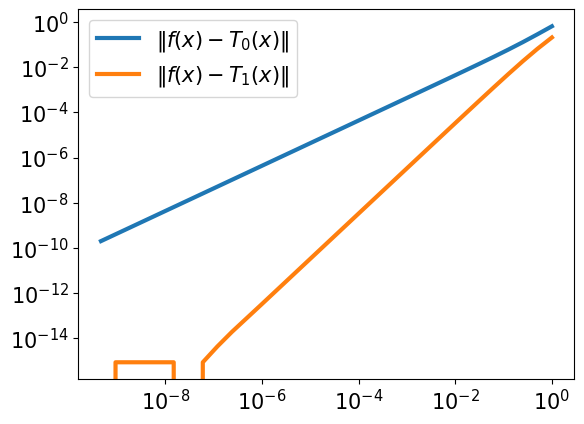

In [36]:
dim = 3
num_edges = 2
num_bins = 1

block_min_width = 0.5
block_max_width = 1

bin_min = 0
bin_max = 2

v_width = np.random.uniform(block_min_width, block_max_width, dim)
v_height = np.random.uniform(block_min_width, block_max_width, dim)

v_area = v_width*v_height

x0 = np.random.uniform(bin_min,bin_max,dim)
y0 = np.random.uniform(bin_min,bin_max,dim)
v_x = np.random.randn(dim)
v_y = np.random.randn(dim)
v_stack = np.vstack((v_x,v_y))

x_len = len(x0)
x = np.concatenate((x0,y0))

#vertex pair indices
v_pair_ind = np.array([[0, 1],[1,2]])


print(W(x0,y0,v_pair_ind))
print(D(x0,y0,v_area))


max_iters = 32
h = np.zeros(max_iters)
err0 = np.zeros(max_iters)
err1 = np.zeros(max_iters)

for i in range(max_iters):
  h[i] = 2**(-i) # halve our stepsize every time

  fv = W(x0 + h[i]*v_x,y0,v_pair_ind)
  T0 = W(x0,y0,v_pair_ind)
  
  [grad_w, grad_x, grad_y] = grad_W(x0,y0,v_pair_ind)
  
  T1 = T0 + h[i]*np.matmul(grad_x, v_x)

  err0[i] = np.linalg.norm(fv - T0) # this error should be linear
  err1[i] = np.linalg.norm(fv - T1) # this error should be quadratic

  # print('h = ', h, ', err0 = ', err0[i], ', err1 = ', err1[i])

  print('h: %.3e, \t err0: %.3e, \t err1: %.3e' % (h[i], err0[i], err1[i]))
  

plt.loglog(h, err0, linewidth=3)
plt.loglog(h, err1, linewidth=3)
plt.legend([r'$\|f(x) - T_0(x)\|$', r'$\|f(x)-T_1(x)\|$'], fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)